# Export shock

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find steady state and Jacobian](#toc2_)    
- 3. [Find IRF](#toc3_)    
- 4. [Figures](#toc4_)    


<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [204]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [205]:
model = BabyMAKROModelClass(name='baseline')           

**Unpack namespaces:**

In [206]:
par = model.par                 
ss = model.ss                   
sol = model.sol                

## 2. <a id='toc2_'></a>[Find steady state and Jacobian](#toc0_)

**Find SS:**

In [207]:
model.find_ss()                 

**Jacobian:**

In [208]:
model.compile(do_print=True)

[40.99833507]
[1.00930623]
[68.76664875]
model compiled, 57.4 secs


In [209]:
model.calc_jac(do_print=True)   

[40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507 40.99833507
 40.99833507 40.99833507 40.99833507 40.99833507 40

## 3. <a id='toc3_'></a>[Find IRF](#toc0_)

**Set exogenous variables:**

In [210]:
model.set_exo_ss()              

**Define shock:**

In [211]:
Tshock = 25                                                                 # length of shock
persistence = np.array([np.exp(-0.1*np.arange(Tshock)**2)])                  # persistence of shock       
persistence = persistence.reshape((Tshock,1)) 
Priceshock = 0.003                                                             #Siz of shock

persistence_chi = np.array([np.exp(-np.arange(Tshock))])                    
persistence_chi = persistence_chi.reshape((Tshock,1))
chi_shock = 0.008            

persistence_r_hh = np.array([np.exp(-0.1*np.arange(Tshock)**2)])                    
persistence_r_hh = persistence_r_hh.reshape((Tshock,1))
r_hh_shock = 0.001     

model.sol.chi[:Tshock,:] = model.ss.chi*(1 + chi_shock*persistence_chi)     # the shock to chi 
model.sol.r_hh[:Tshock,:] = model.ss.r_hh*(1+r_hh_shock*persistence_r_hh)  # Shock to interest rate
model.sol.P_F[:Tshock,:] = model.ss.P_F*(1 + Priceshock*persistence)        # shock to the foreign price
model.sol.P_M_C[:Tshock,:] = model.ss.P_M_C*(1 + Priceshock*persistence)    # shock to the consumption import price 
model.sol.P_M_G[:Tshock,:] = model.ss.P_M_G*(1 + Priceshock*persistence)    # shock to the government consumption import price  
model.sol.P_M_I[:Tshock,:] = model.ss.P_M_I*(1 + Priceshock*persistence)    # shock to the investment import price  
model.sol.P_M_X[:Tshock,:] = model.ss.P_M_X*(1 + Priceshock*persistence)    # shock to the export import price  

**Find IRF:**

In [212]:
model.find_IRF()              

[82.33028096]
[1.01021773]
[109.15304584]
initial:

    max. abs. error = 4.89e+01
    2.06e+01 in A_R_ini_error
    8.54e-01 in Aq_diff
    3.28e-04 in FOC_capital_agency
    2.16e+00 in FOC_K_ell
    4.89e+01 in mkt_clearing
    5.98e-04 in PC
t1-t0 = 0.06282 secs
[123.72316964]
[1.01460278]
[143.04609046]

    max. abs. error = 8.35e+01
    2.59e+01 in A_R_ini_error
    1.19e+00 in Aq_diff
    6.42e-06 in FOC_capital_agency
    2.89e+00 in FOC_K_ell
    8.35e+01 in mkt_clearing
    1.55e-03 in PC
[165.09914484]
[1.01239165]
[173.28307167]

    max. abs. error = 1.14e+02
    2.68e+01 in A_R_ini_error
    1.36e+00 in Aq_diff
    6.96e-06 in FOC_capital_agency
    3.27e+00 in FOC_K_ell
    1.14e+02 in mkt_clearing
    6.73e-03 in PC
[206.31223797]
[0.99902904]
[200.97334501]

    max. abs. error =      nan
    2.83e+01 in A_R_ini_error
    1.52e+00 in Aq_diff
    3.09e-05 in FOC_capital_agency
         nan in FOC_K_ell
    1.40e+02 in mkt_clearing
         nan in PC
[nan]3
[nan]
[nan]


ValueError: no convergence after 100 iterations

## 4. <a id='toc4_'></a>[Figures](#toc0_)

**Get data for emperical IRF**

In [ ]:
empirical_IRF = pd.read_csv('data/empirical_IRF.csv')
#Only use data for foreign demand shock
empirical_IRF = empirical_IRF[(empirical_IRF['Shock'] == 'ForeignDemand')]


variables_data = empirical_IRF['Variable'].unique()
# Print the variables and shocks
print("Variable names in data set:")
print(variables_data)


Variable names in data set:
['log(GDP)' 'log(C)' 'log(IM)' 'log(IBx)' 'log(Ibol)' 'log(EX)'
 'MarkovUgap' 'log(PC)' 'log(PY)' 'log(W_rel)' 'log(PBol)' 'log(PEX)'
 'Sentiment' 'RF' 'PF' 'YF']


**Plot foreign demand shock IRF's from model results and data for relevant variables** 

In [ ]:
# Map variable names from model to dataset
mapping = {'chi': 'YF', 'P_F': 'PF', 'r_hh' : 'RF', 'P_X': 'log(PEX)', 'P_Y': 'log(PY)', 'P_C': 'log(PC)', 'X': 'log(EX)', 'Y': 'log(GDP)', 'C': 'log(C)', 'real_W': 'log(W_rel)', 'U': 'MarkovUgap', 'I': 'log(IM)'}
variables = list(mapping.keys())

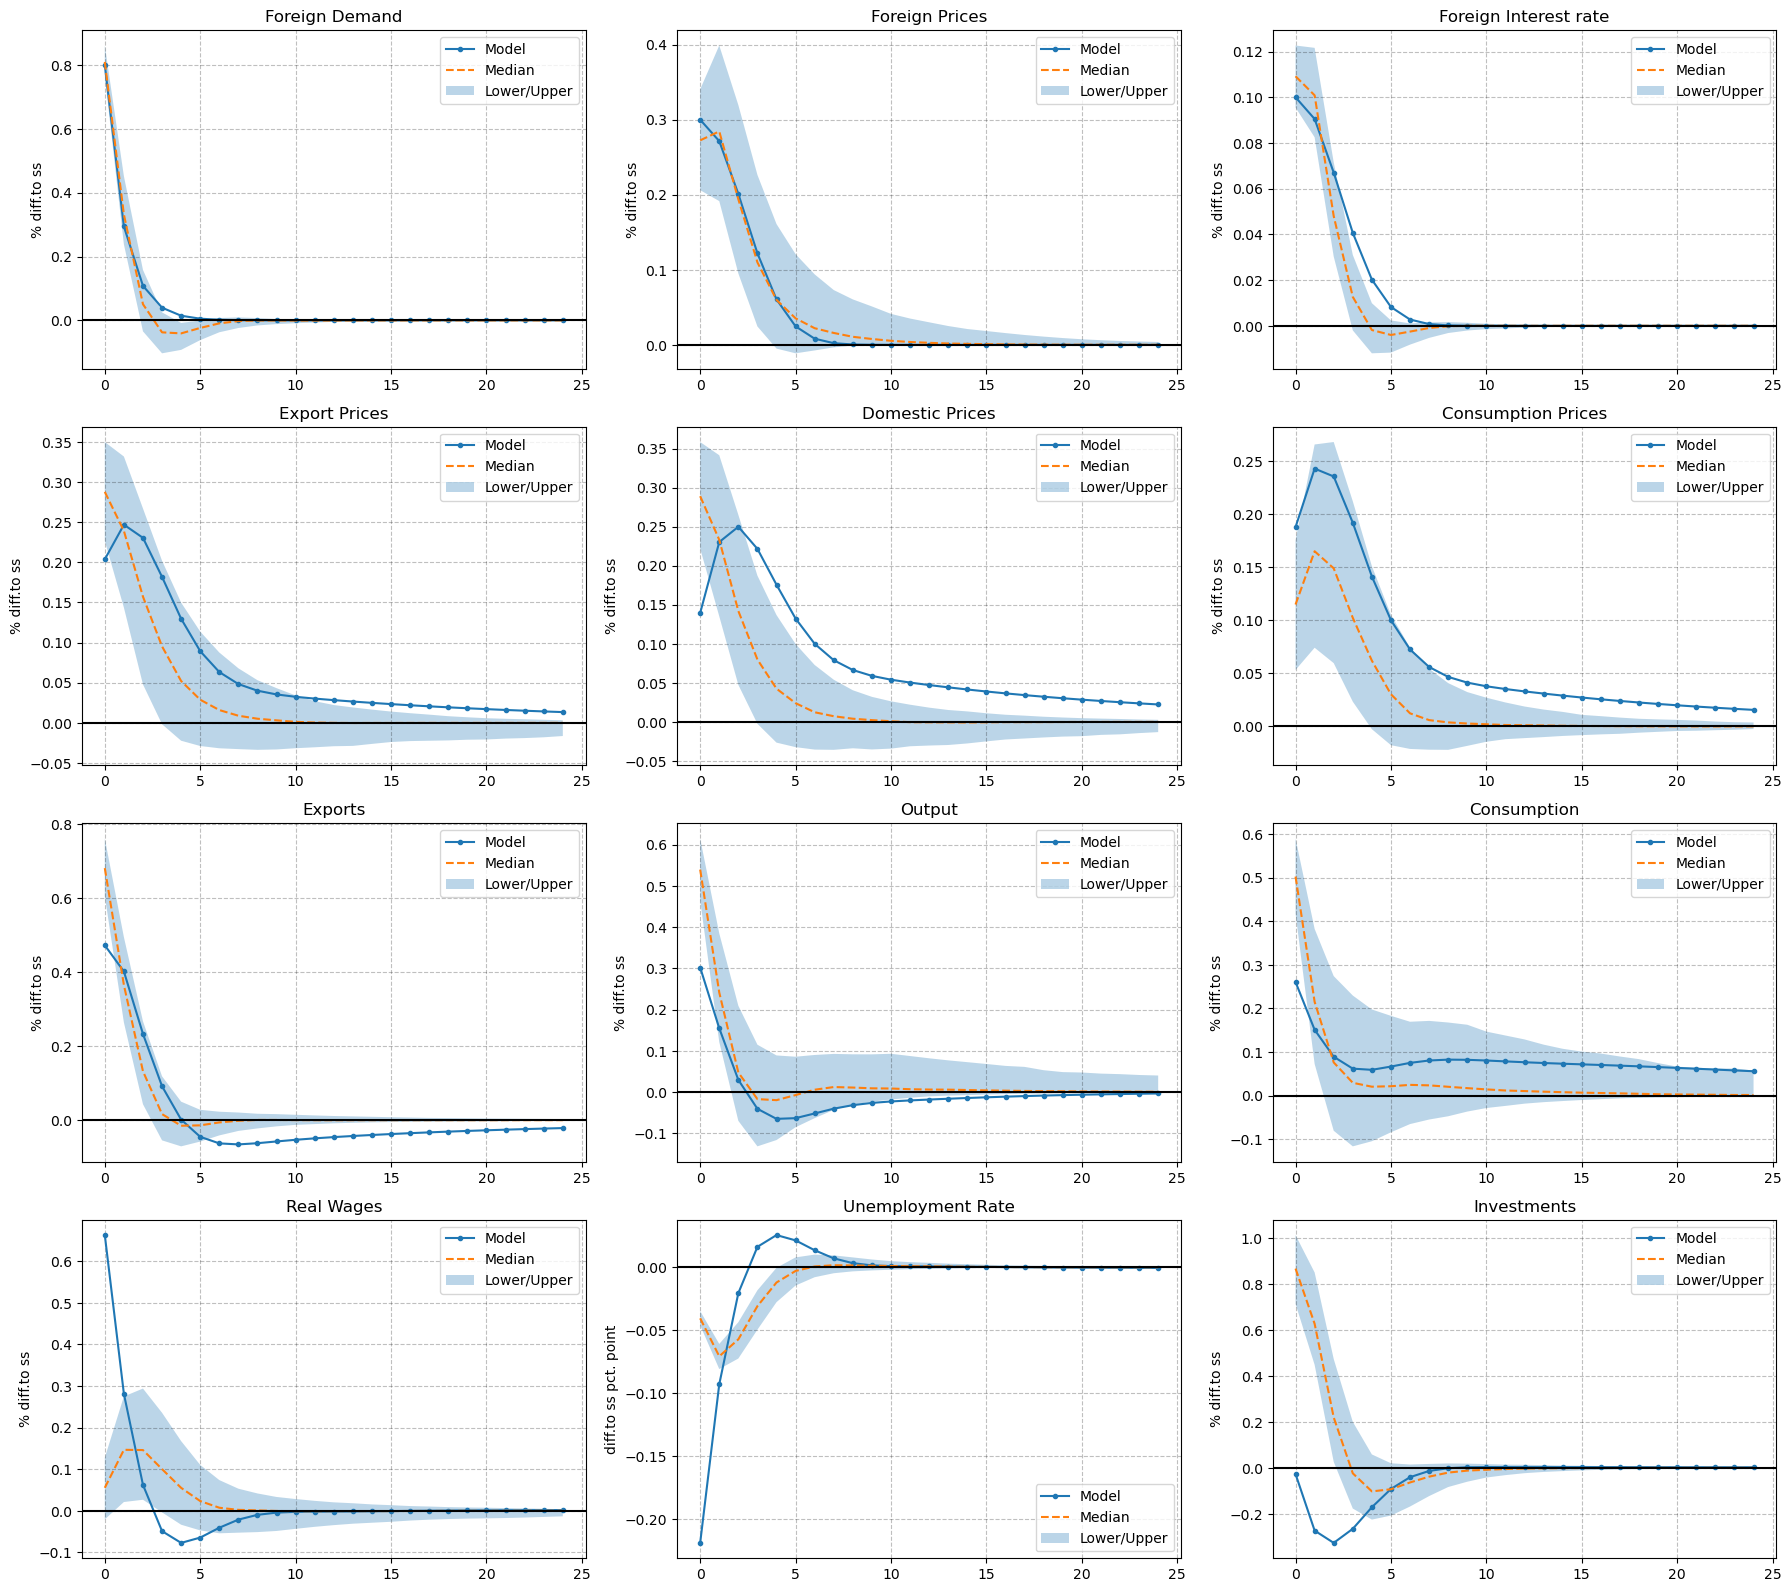

In [ ]:

#Plot IRF's
def plot_IRF(self,varlist,ncol=3,T_IRF=Tshock, abs = None,Y_share = None):
        """ plot IRFs """

        if abs is None:
            abs = []
        if Y_share is None:
            Y_share = []
                
        ss = self.ss
        sol = self.sol

        nrow = len(varlist)//ncol
        if len(varlist) > nrow*ncol: nrow+=1

        fig = plt.figure(figsize=(ncol*6,nrow*6/1.5))
        for i,varname in enumerate(varlist):

            ax = fig.add_subplot(nrow,ncol,1+i)

            path = sol.__dict__[varname]
            ssvalue = ss.__dict__[varname]

            empirical_variable = mapping.get(varname)
            shock_IRF = empirical_IRF[(empirical_IRF['Variable'] == empirical_variable)]
            
            if varname == 'U':
                ax.set_ylabel('diff.to ss pct. point')
                ax.plot((path[:T_IRF]-ssvalue),'-o',markersize=3, label='Model')
                ax.plot(shock_IRF['Time'], shock_IRF['Median'], linestyle='--', label='Median')
                plt.fill_between(shock_IRF['Time'], shock_IRF['Lower'], shock_IRF['Upper'], alpha=0.3, label='Lower/Upper')
            elif varname in abs:
                ax.axhline(ssvalue,color='black')
                ax.plot(path[:T_IRF],'-o',markersize=3, label='Model')
                ax.plot(shock_IRF['Time'], shock_IRF['Median'], linestyle='--', label='Median')
                plt.fill_between(shock_IRF['Time'], shock_IRF['Lower'], shock_IRF['Upper'], alpha=0.3, label='Lower/Upper')
            elif varname in Y_share:
                ax.axhline(ssvalue/ss.Y,color='black')
                ax.plot(path[:T_IRF]/sol.Y[:T_IRF],'-o',markersize=3, label='Model')   
                ax.set_ylabel('share of Y')       
                ax.plot(shock_IRF['Time'], shock_IRF['Median'], linestyle='--', label='Median')
                plt.fill_between(shock_IRF['Time'], shock_IRF['Lower'], shock_IRF['Upper'], alpha=0.3, label='Lower/Upper')  
            elif np.isclose(ssvalue,0.0):
                ax.plot(path[:T_IRF]-ssvalue,'-o',markersize=3, label='Model')
                ax.set_ylabel('diff.to ss')
                ax.plot(shock_IRF['Time'], shock_IRF['Median'], linestyle='--', label='Median')
                plt.fill_between(shock_IRF['Time'], shock_IRF['Lower'], shock_IRF['Upper'], alpha=0.3, label='Lower/Upper')
            else:
                ax.plot((path[:T_IRF]/ssvalue-1)*100,'-o',markersize=3, label='Model')
                ax.set_ylabel('% diff.to ss')
                ax.plot(shock_IRF['Time'], shock_IRF['Median'], linestyle='--', label='Median')
                plt.fill_between(shock_IRF['Time'], shock_IRF['Lower'], shock_IRF['Upper'], alpha=0.3, label='Lower/Upper')
            
            label = self.labels[varname]
            ax.axhline(0,color='black')
            ax.set_title(label)
            plt.legend()

        fig.tight_layout(pad=1.0)

plot_IRF(model, varlist=variables)



    